In [1]:
import numpy as np
import skimage.io
import os
import warnings
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import cv2

warnings.filterwarnings('ignore')

In [2]:
def medianFilter(path, noisy_level):
    """
    Median Filter is applied to 25 images
    :param path: original image path so we can loop it
    :param noisy_level: noisy level - 10, 25, 50
    :return: 
    """
    for e, i in enumerate(os.listdir(path)):
        if e == 0:
            filename = i.split(".")[0] + ".png"

            # Original Image
            original = skimage.io.imread(path + filename)

            # Given Noisy image with noisy level
            noisy = skimage.io.imread("images/" + noisy_level + "/" + filename)

            # Filter with Size 3
            filter_3 = cv2.medianBlur(noisy, 3)

            # Filter with size 5
            filter_5 = cv2.medianBlur(noisy, 5)

            # Combine all dispalying images to gether
            all_filtered_images = [original, noisy, filter_3, filter_5]

            # Plot four images to gether and labels for it
            all_filter_image_labels = ["Original", "Noisy", "Median Filter with size 3",
                                       "Median Filter with size 5"]
            plt.figure(figsize=(16, 12))
            mse_result = 0
            for i, image in enumerate(all_filtered_images):
                # Counting MSE score
                mse_result = np.mean((original - image) ** 2).astype(np.uint8)
                # Counting SSIM index
                ssim_index = ssim(original, image, data_range=image.max() - image.min(), multichannel=True)

                plt.subplot(2, 2, i + 1)
                plt.xticks([])
                plt.yticks([])
                plt.title(all_filter_image_labels[i] + "\n MSE Result = " + str(mse_result) + "\n SSIM Index = " + str(ssim_index) , fontsize=15)
                plt.imshow(image)

## Passing the noisy image level 10

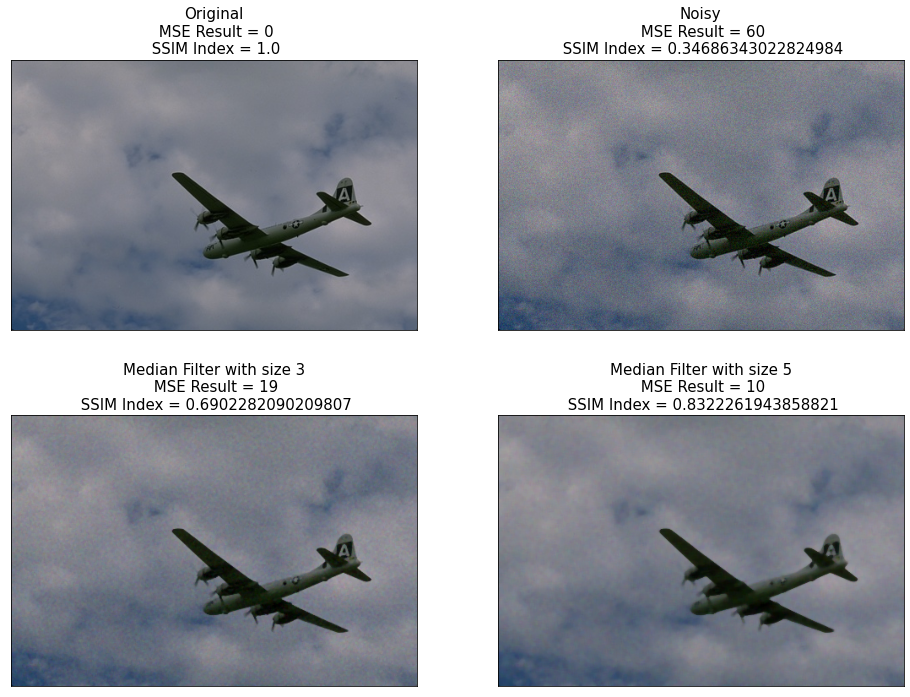

In [3]:
path = "images/original/"
level = "noisy10"
medianFilter(path, level)

## Passing the noisy image level 25

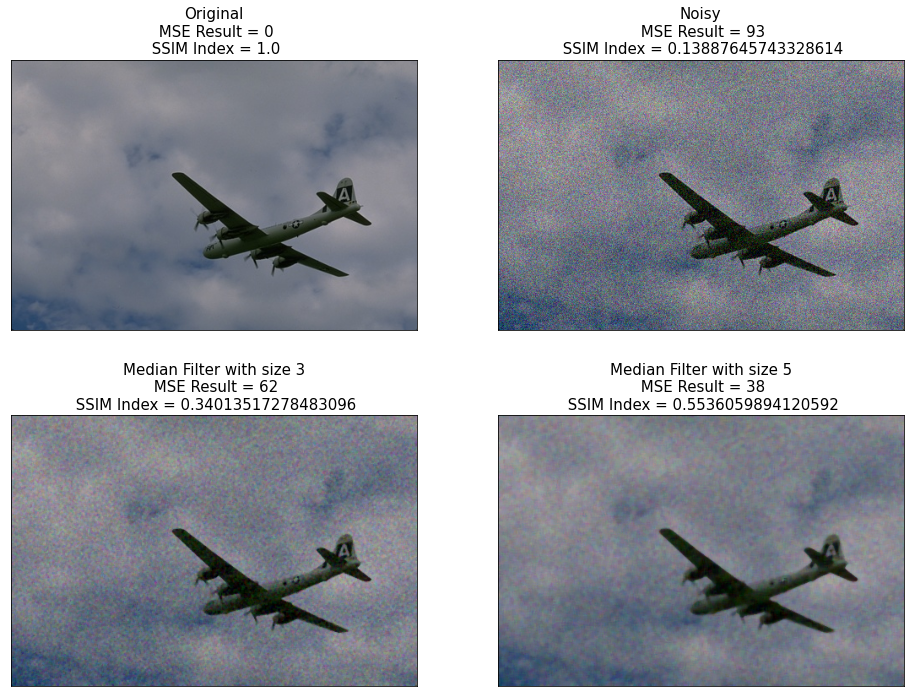

In [4]:
level = "noisy25"
medianFilter(path, level)

## Passing the noisy image level 50

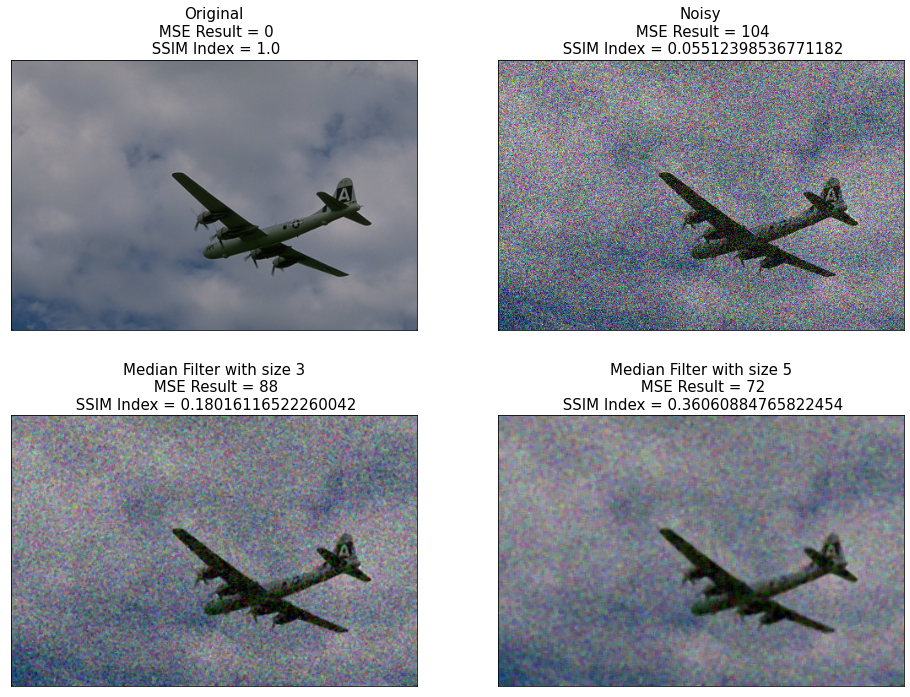

In [5]:
level = "noisy50"
medianFilter(path, level)